<a href="https://colab.research.google.com/github/Pedro-Ortega-G/TAM/blob/main/regresiones_varias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Lee el archivo usando pandas (asumiendo que está en el entorno actual)
df = pd.read_csv('2023_nba_player_stats.csv')

# Muestra las primeras filas del DataFrame para verificar
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [ ]:
X = df[['PTS', 'REB', 'AST','OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%'
]]  # Ejemplo: usando puntos, rebotes y asistencias como predictoras
y = df['Min']  # Ejemplo: usando minutos por juego como variable objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% para entrenar, 20% para probar

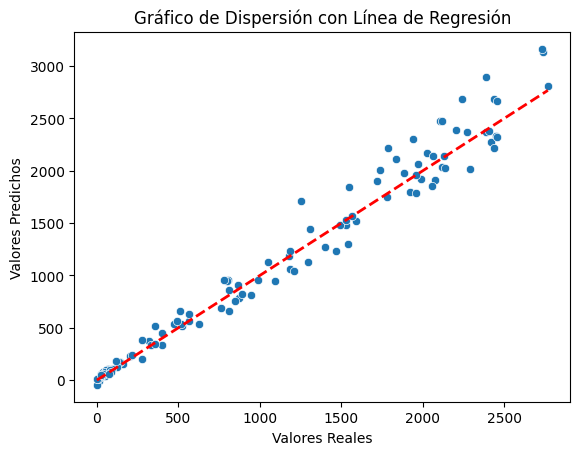

MAE Linear Regresion: 113.37398453278567


In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred_LR = modelo.predict(X_test)
# Gráfico de dispersión para los datos de prueba
sns.scatterplot(x=y_test, y=y_pred_LR)

# Línea de regresión
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal (ideal)

plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Dispersión con Línea de Regresión")

plt.show()

# Calcula el MAE
mae_LR = mean_absolute_error(y_test, y_pred_LR)

# Imprime el MAE
print(f"MAE Linear Regresion: {mae_LR}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.331e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(


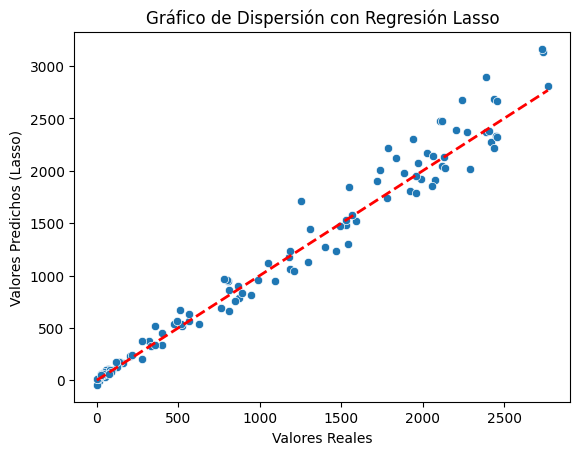

MAE Lasso: 113.39772155974212


In [ ]:
# Crear y entrenar el modelo Lasso
modelo_lasso = Lasso(alpha=1.0)  # Puedes ajustar el valor de 'alpha' (regularización)
modelo_lasso.fit(X_train, y_train)

# Hacer predicciones con el modelo Lasso
y_pred_lasso = modelo_lasso.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (Lasso)")
plt.title("Gráfico de Dispersión con Regresión Lasso")
plt.show()

# Calcular e imprimir el MAE para el modelo Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"MAE Lasso: {mae_lasso}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.285e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(


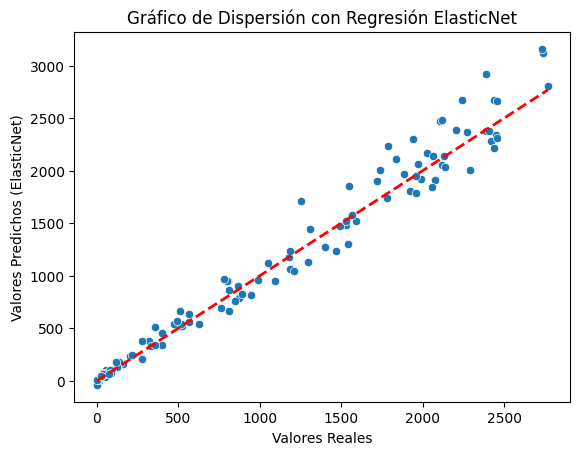

MAE ElasticNet: 113.02971670645009


In [ ]:
# Crear y entrenar el modelo ElasticNet
modelo_elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Puedes ajustar alpha y l1_ratio
modelo_elasticnet.fit(X_train, y_train)

# Hacer predicciones con el modelo ElasticNet
y_pred_elasticnet = modelo_elasticnet.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_elasticnet)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (ElasticNet)")
plt.title("Gráfico de Dispersión con Regresión ElasticNet")
plt.show()

# Calcular e imprimir el MAE para el modelo ElasticNet
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
print(f"MAE ElasticNet: {mae_elasticnet}")

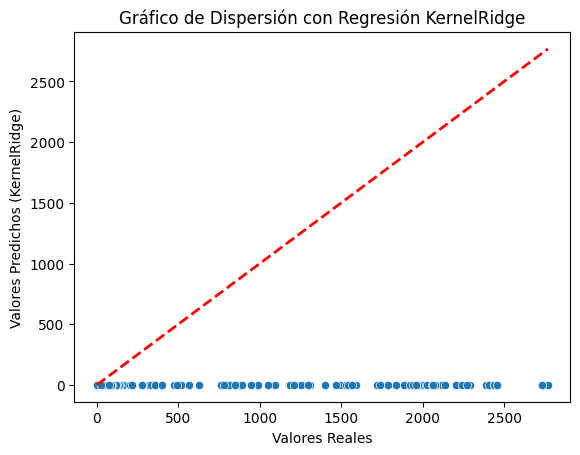

MAE KernelRidge: 1146.8447417677812


In [ ]:
# Crear y entrenar el modelo KernelRidge
modelo_kernelridge = KernelRidge(alpha=1.0, kernel='rbf')  # Puedes ajustar alpha y el kernel
modelo_kernelridge.fit(X_train, y_train)

# Hacer predicciones con el modelo KernelRidge
y_pred_kernelridge = modelo_kernelridge.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_kernelridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (KernelRidge)")
plt.title("Gráfico de Dispersión con Regresión KernelRidge")
plt.show()

# Calcular e imprimir el MAE para el modelo KernelRidge
mae_kernelridge = mean_absolute_error(y_test, y_pred_kernelridge)
print(f"MAE KernelRidge: {mae_kernelridge}")

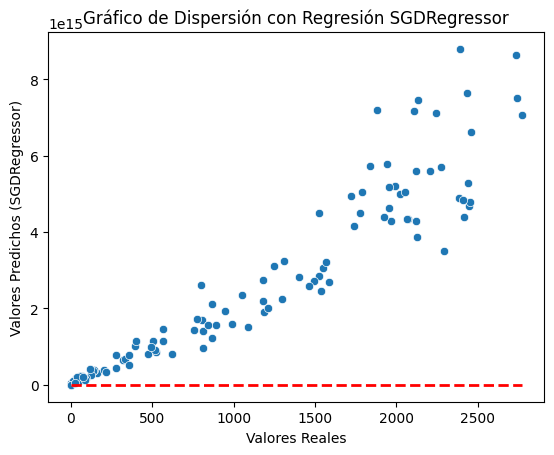

MAE SGDRegressor: 2702703391967082.5


In [ ]:
# Crear y entrenar el modelo SGDRegressor
modelo_sgd = SGDRegressor(loss='squared_error', alpha=0.0001, random_state=42) # Puedes ajustar la pérdida, alpha, etc.
modelo_sgd.fit(X_train, y_train)

# Hacer predicciones con el modelo SGDRegressor
y_pred_sgd = modelo_sgd.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_sgd)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (SGDRegressor)")
plt.title("Gráfico de Dispersión con Regresión SGDRegressor")
plt.show()

# Calcular e imprimir el MAE para el modelo SGDRegressor
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print(f"MAE SGDRegressor: {mae_sgd}")

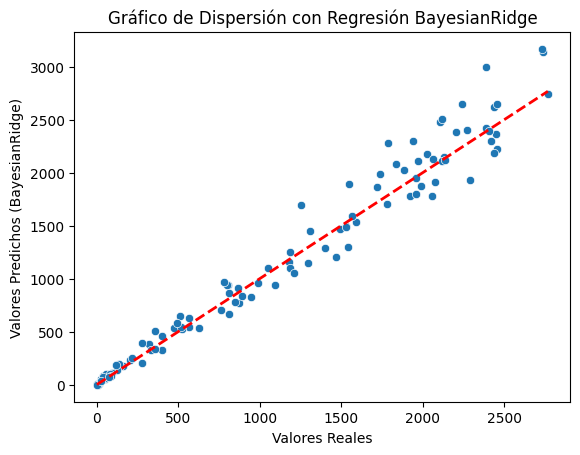

MAE BayesianRidge: 115.9857648137348


In [ ]:
# Crear y entrenar el modelo BayesianRidge
modelo_bayesianridge = BayesianRidge()  # Puedes ajustar los hiperparámetros si es necesario
modelo_bayesianridge.fit(X_train, y_train)

# Hacer predicciones con el modelo BayesianRidge
y_pred_bayesianridge = modelo_bayesianridge.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_bayesianridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (BayesianRidge)")
plt.title("Gráfico de Dispersión con Regresión BayesianRidge")
plt.show()

# Calcular e imprimir el MAE para el modelo BayesianRidge
mae_bayesianridge = mean_absolute_error(y_test, y_pred_bayesianridge)
print(f"MAE BayesianRidge: {mae_bayesianridge}")

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


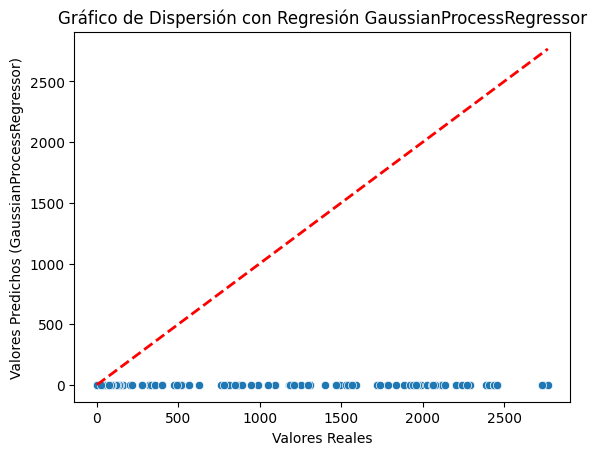

MAE GaussianProcessRegressor: 1146.8611110907711


In [ ]:
# Crear y entrenar el modelo GaussianProcessRegressor
kernel = 1.0 * RBF(1.0)  # Puedes ajustar el kernel y sus parámetros
modelo_gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
modelo_gpr.fit(X_train, y_train)

# Hacer predicciones con el modelo GaussianProcessRegressor
y_pred_gpr, sigma = modelo_gpr.predict(X_test, return_std=True)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_gpr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (GaussianProcessRegressor)")
plt.title("Gráfico de Dispersión con Regresión GaussianProcessRegressor")
plt.show()

# Calcular e imprimir el MAE para el modelo GaussianProcessRegressor
mae_gpr = mean_absolute_error(y_test, y_pred_gpr)
print(f"MAE GaussianProcessRegressor: {mae_gpr}")

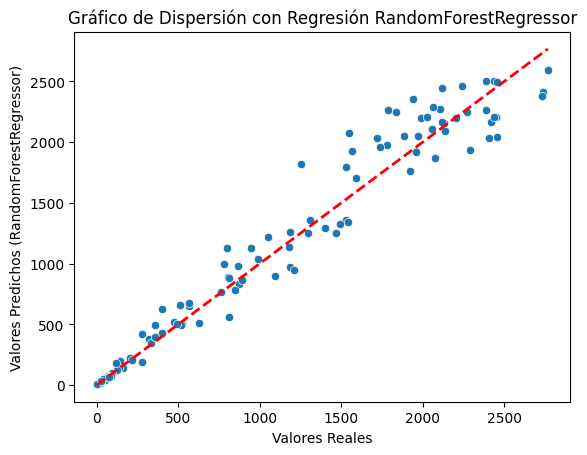

MAE RandomForestRegressor: 129.97496296296296


In [ ]:
# Crear y entrenar el modelo RandomForestRegressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros
modelo_rf.fit(X_train, y_train)

# Hacer predicciones con el modelo RandomForestRegressor
y_pred_rf = modelo_rf.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (RandomForestRegressor)")
plt.title("Gráfico de Dispersión con Regresión RandomForestRegressor")
plt.show()

# Calcular e imprimir el MAE para el modelo RandomForestRegressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE RandomForestRegressor: {mae_rf}")

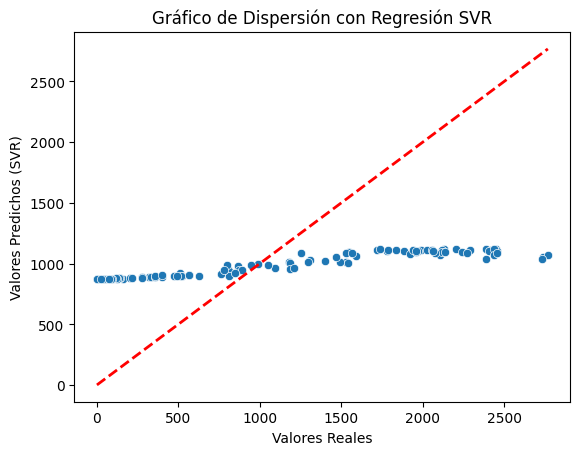

MAE SVR: 688.0287671666106


In [ ]:
# Crear y entrenar el modelo SVR
modelo_svr = SVR(kernel='rbf')  # Puedes ajustar el kernel, C, epsilon, etc.
modelo_svr.fit(X_train, y_train)

# Hacer predicciones con el modelo SVR
y_pred_svr = modelo_svr.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (SVR)")
plt.title("Gráfico de Dispersión con Regresión SVR")
plt.show()

# Calcular e imprimir el MAE para el modelo SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"MAE SVR: {mae_svr}")